In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
train_features  = pd.read_csv('./Data/training_set_features.csv')
train_labels = pd.read_csv('./Data/training_set_labels.csv')

In [3]:
df = pd.merge(train_features, train_labels, on='respondent_id')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Graphs

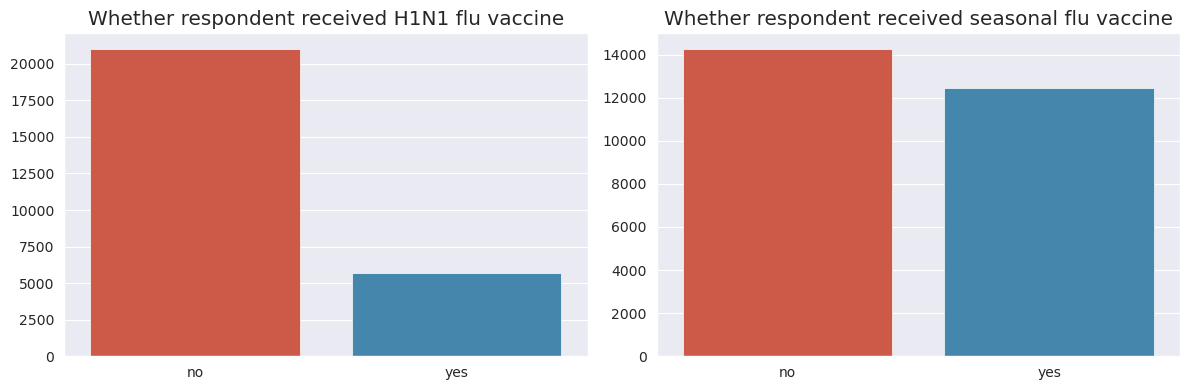

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=['no', 'yes'], y=df.h1n1_vaccine.value_counts().values, ax=ax[0])
ax[0].set_title('Whether respondent received H1N1 flu vaccine')

sns.barplot(x=['no', 'yes'], y=df.seasonal_vaccine.value_counts().values, ax=ax[1])
ax[1].set_title('Whether respondent received seasonal flu vaccine')

plt.tight_layout()
plt.show()

<b>
Considerably larger number of people have chosen to take the seasonal flu vaccine compared to those who took the H1N1 vaccine
</b>

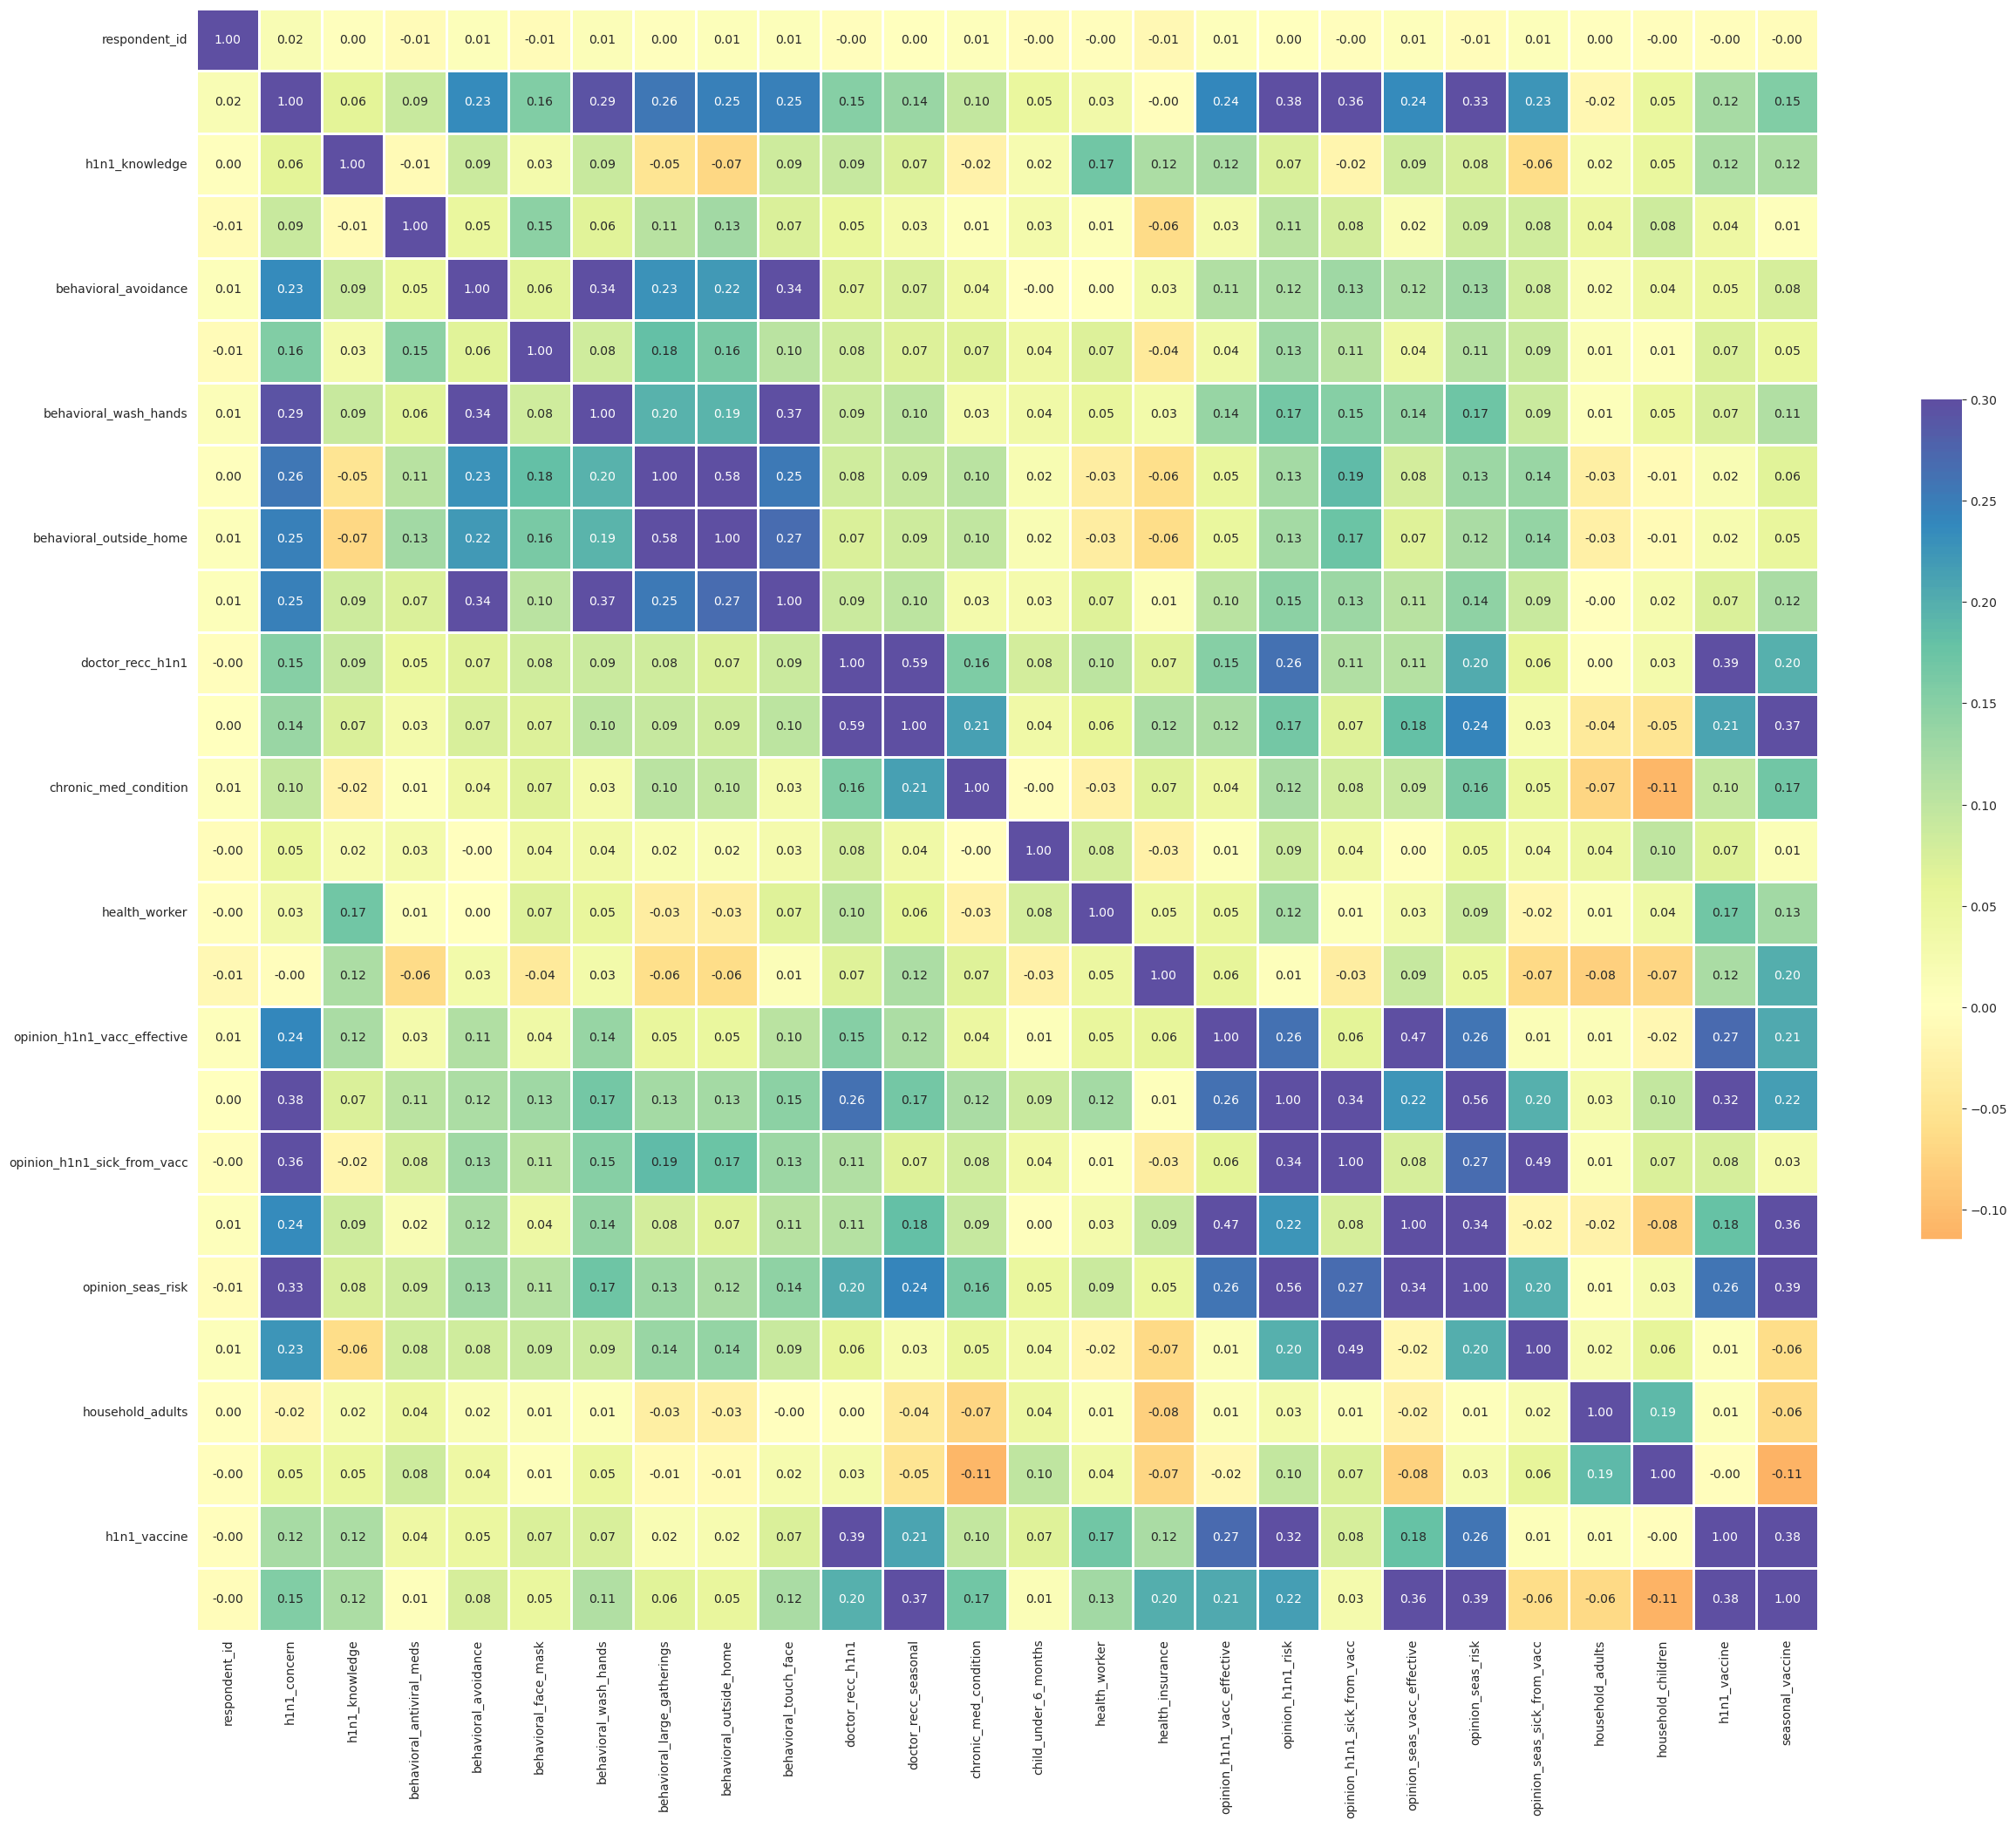

In [6]:
g = sns.heatmap(df.corr(numeric_only=True), vmax=0.3, center=0, square=True, linewidths=1, 
                cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30, 25)

plt.show()

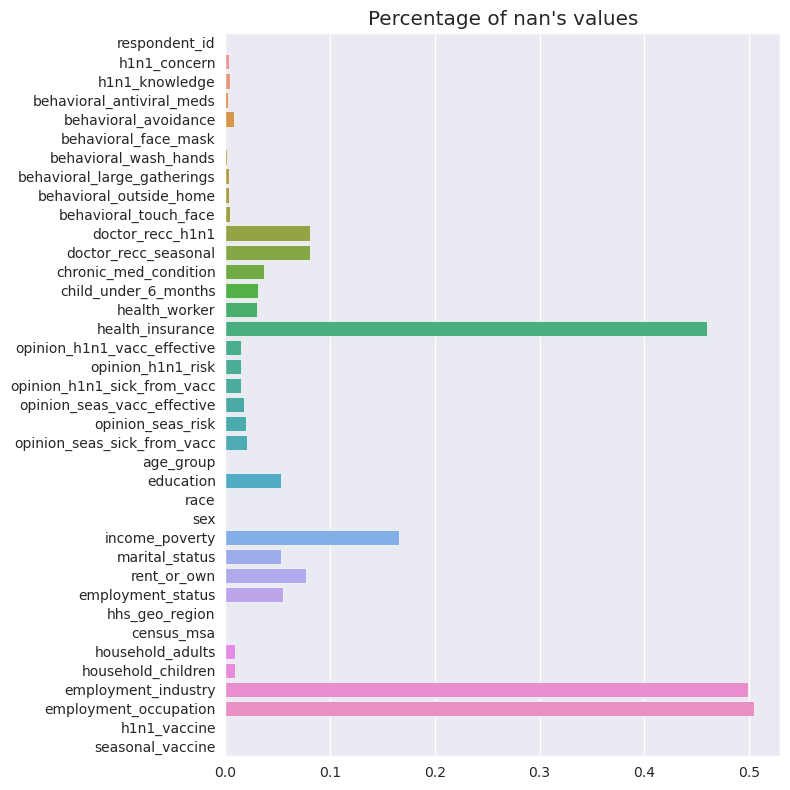

In [7]:
_, ax = plt.subplots(1, figsize=(8, 8))
sns.barplot(y=df.columns, x=df.isna().sum() / df.shape[0], orient='h', ax=ax)
ax.set_title('Percentage of nan\'s values')
plt.tight_layout()
plt.show()

In [8]:
cat_features = df.select_dtypes('object').columns.tolist()

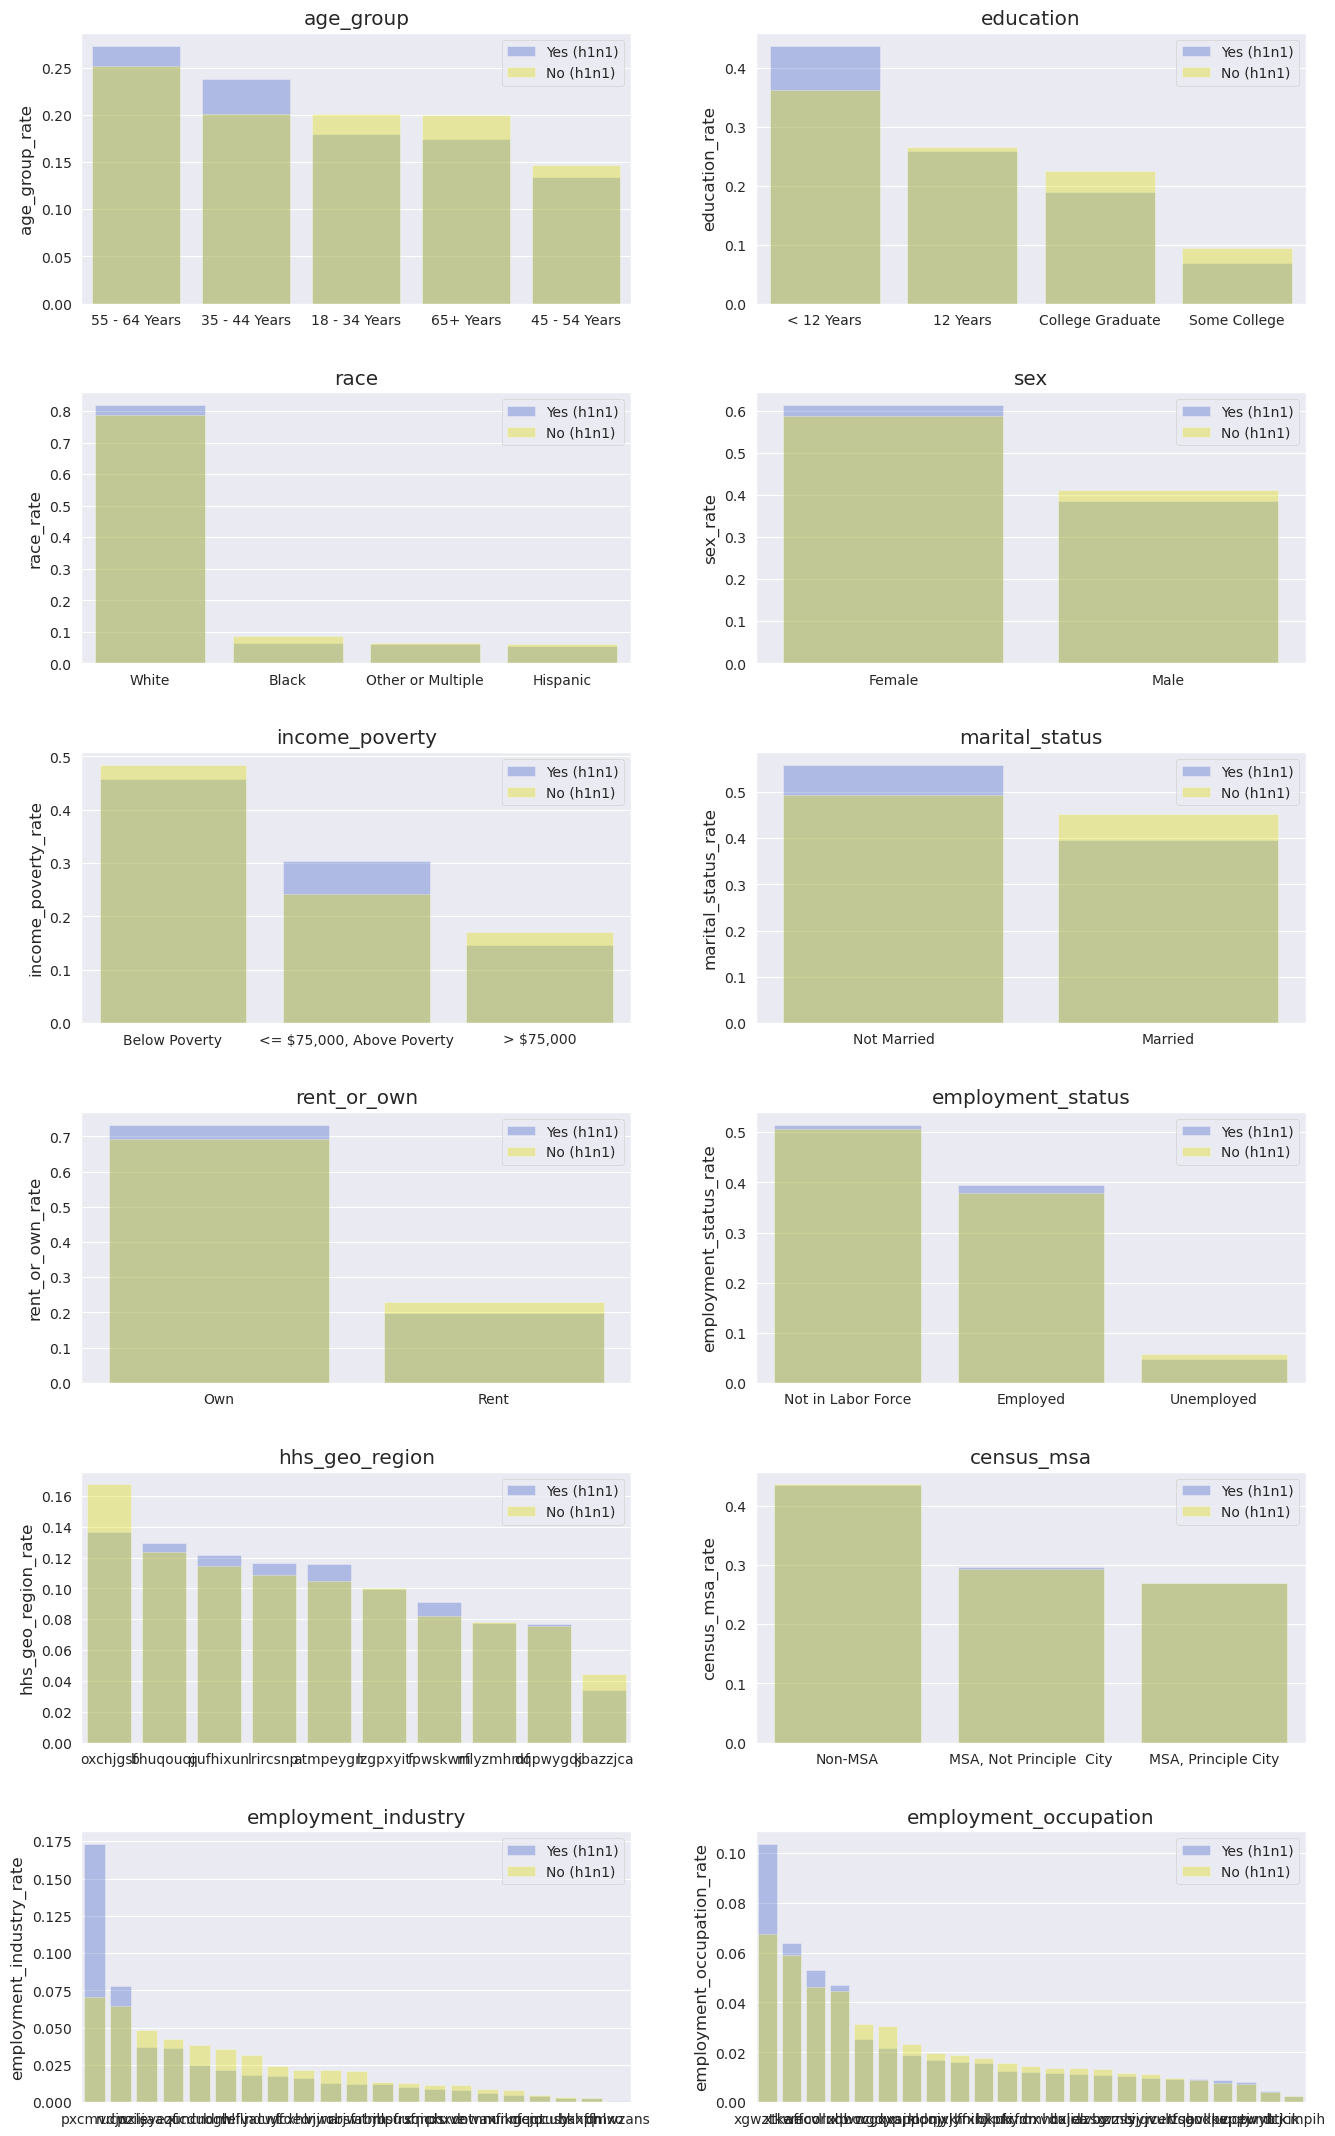

In [9]:
fig, ax = plt.subplots(len(cat_features) // 2, 2, figsize=(14, 22))

for feature, curr_ax in zip(cat_features, ax.ravel()):
    
    sns.barplot(x=df[feature].unique(), 
                y=df[df.h1n1_vaccine == 1][feature].value_counts(dropna=False, normalize=True), 
                alpha=0.4, 
                label='Yes (h1n1)',
                ax=curr_ax,
                color='royalblue')
    
    sns.barplot(x=df[feature].unique(), 
                y=df[df.h1n1_vaccine == 0][feature].value_counts(dropna=False, normalize=True), 
                alpha=0.4, 
                label='No (h1n1)',
                ax=curr_ax,
                color='yellow')
    
    curr_ax.set_title(feature)
    curr_ax.set_ylabel(feature + '_rate')
    curr_ax.legend()

plt.tight_layout(pad=3)
plt.show()

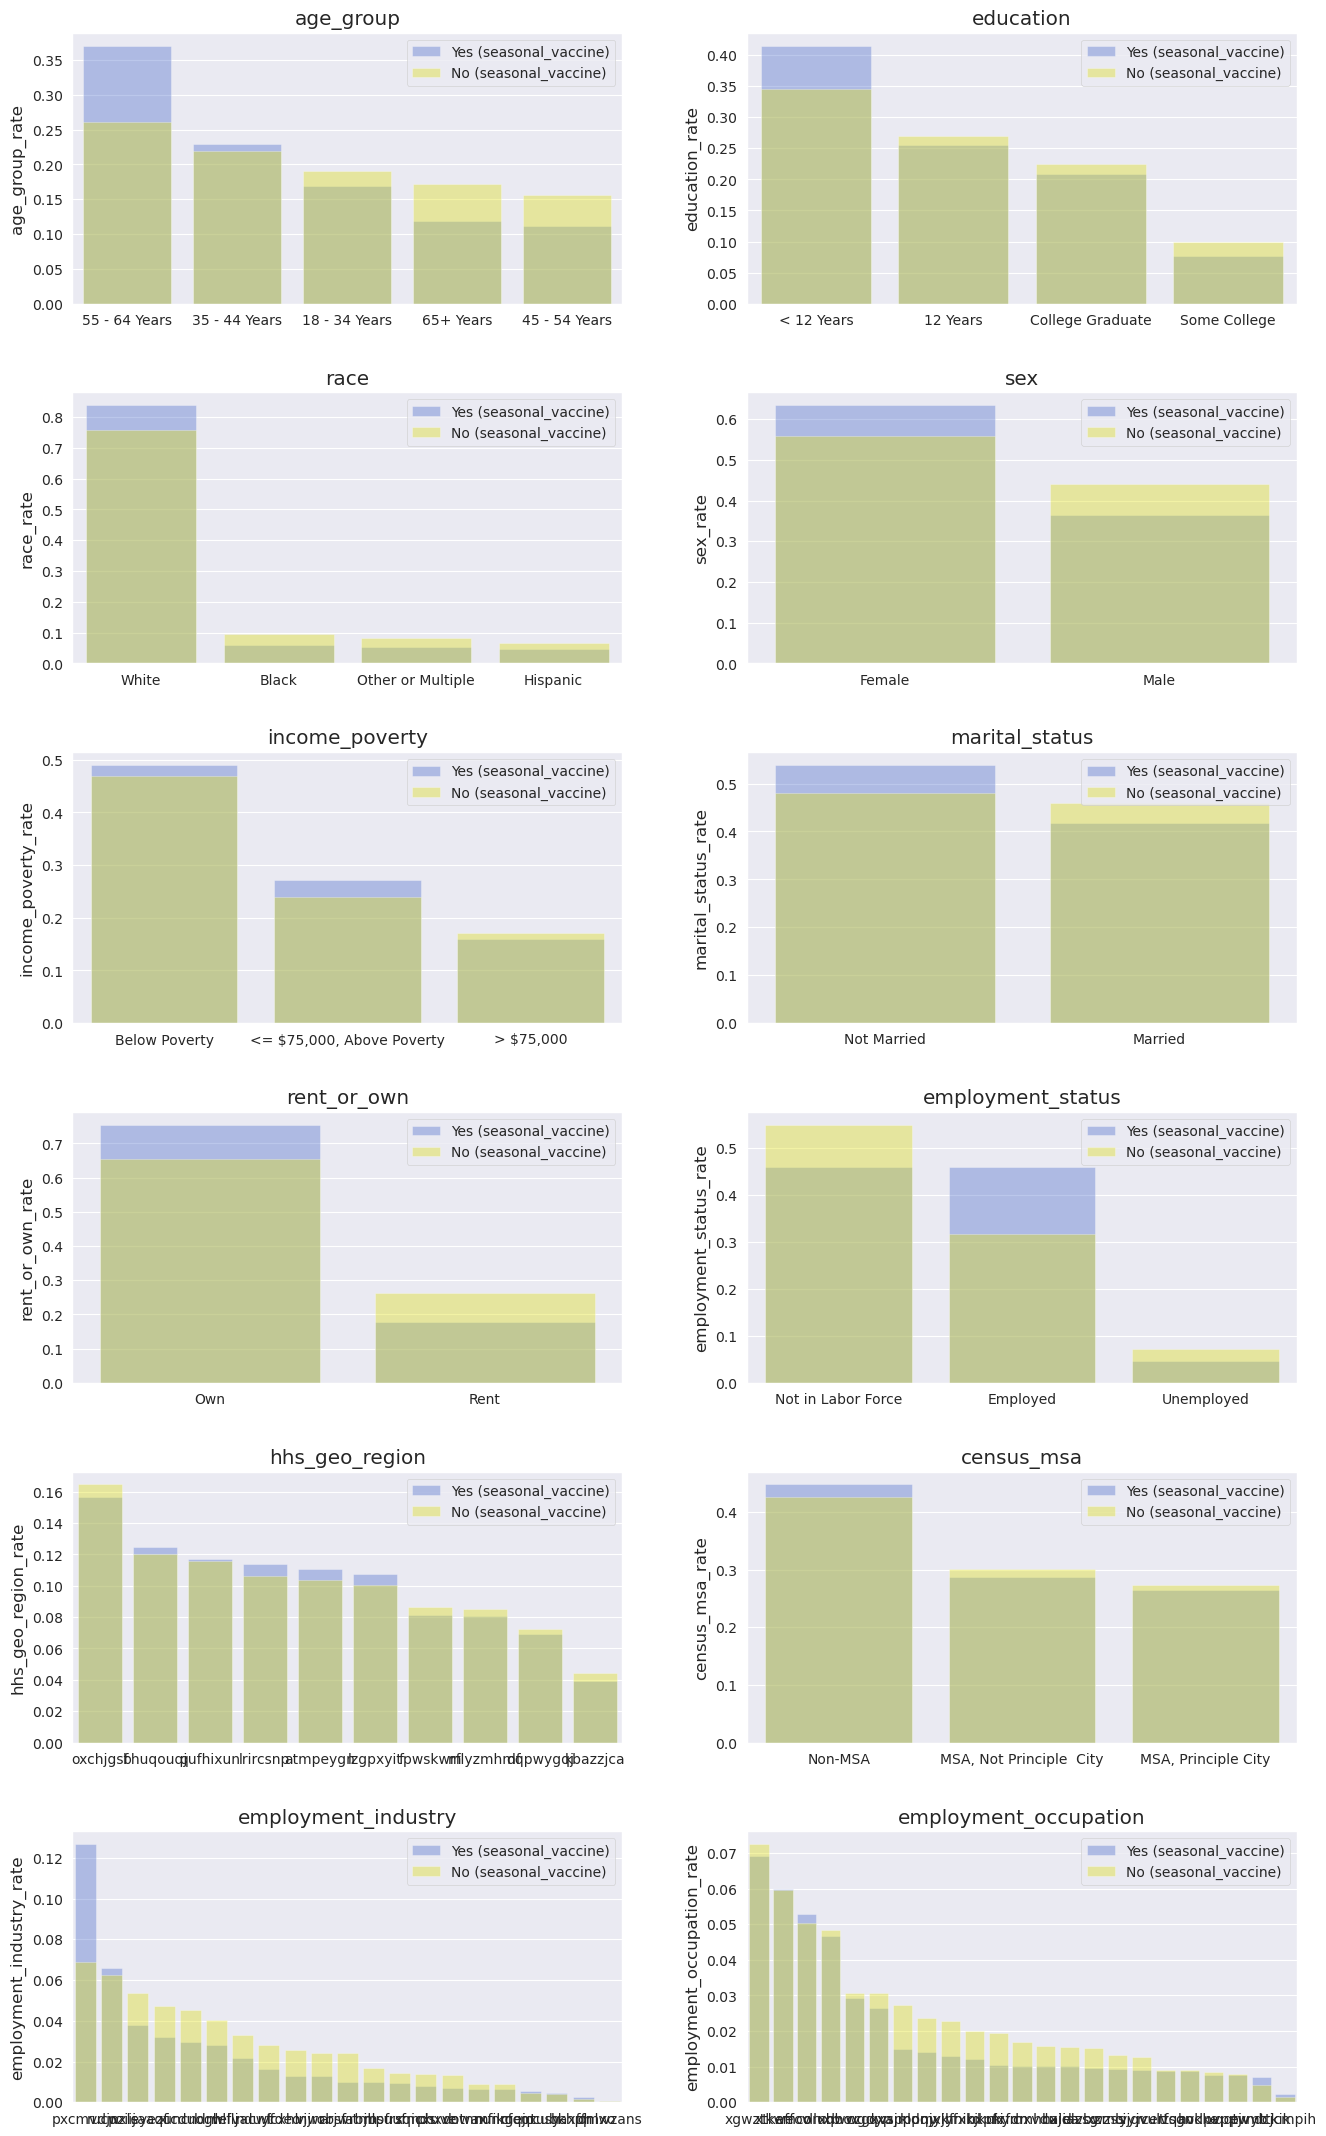

In [10]:
fig, ax = plt.subplots(len(cat_features) // 2, 2, figsize=(14, 22))

for feature, curr_ax in zip(cat_features, ax.ravel()):
    
    sns.barplot(x=df[feature].unique(), 
                y=df[df.seasonal_vaccine == 1][feature].value_counts(dropna=False, normalize=True), 
                alpha=0.4, 
                label='Yes (seasonal_vaccine)',
                ax=curr_ax,
                color='royalblue')
    
    sns.barplot(x=df[feature].unique(), 
                y=df[df.seasonal_vaccine == 0][feature].value_counts(dropna=False, normalize=True), 
                alpha=0.4, 
                label='No (seasonal_vaccine)',
                ax=curr_ax,
                color='yellow')
    
    curr_ax.set_title(feature)
    curr_ax.set_ylabel(feature + '_rate')
    curr_ax.legend()

plt.tight_layout(pad=3)
plt.show()

<b>
A look at the columns with a lot of nans
</b>

In [11]:
df.health_insurance.value_counts(dropna=False)

1.0    12697
NaN    12274
0.0     1736
Name: health_insurance, dtype: int64

In [12]:
df.income_poverty.value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [13]:
df.employment_industry.value_counts(dropna=False)

NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [14]:
df.employment_occupation.value_counts(dropna=False)

NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

# <b> Feature engineering </b>

## Behavior

In [15]:
# High Positive correlations between the 'behavioral_features', lets combine them to 1 feature

behavioral_features = df.columns[df.columns.str.startswith('behavioral_')].tolist()
df['behavior'] = df[behavioral_features].mean(axis=1)

In [16]:
df['behavior'].isna().sum()

0

In [17]:
df = df.drop(columns=behavioral_features)

## Opinion

In [18]:
opinion_features = df.columns[df.columns.str.startswith('opinion_')].\
                      drop(['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc']).\
                      tolist()
df['opinion'] = df[opinion_features].mean(axis=1).apply(lambda x: x if x is None else np.round(x, 0))

In [19]:
df.opinion.isna().sum()

296

In [20]:
df = df.drop(columns=opinion_features+['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc'])

## Census_msa

In [21]:
df = df.drop(columns=['census_msa'])

# <b> Filling NaN's </b>

health_insurance, employment_industry, employment_occupation, education have a lot of nan's, but they can be helpful while predicting target. So we will inplace nan's with 'unknown' and then will apply one hot encoder. income_poverty will be encoded with ordinary encoder

In [22]:
unknown_filled_features = ['health_insurance', 
                           'employment_industry', 
                           'employment_occupation', 
                           'income_poverty',
                           'education']

df[unknown_filled_features] = df[unknown_filled_features].fillna('unknown')

Next features have high correlation with target >> we will not fill them with median values like others to prevent some wrong dependencies

In [23]:
df.shape[0]

26707

In [24]:
dropna_features = ['h1n1_concern',
                   'h1n1_knowledge',
                   'doctor_recc_h1n1', 
                   'doctor_recc_seasonal',
                   'chronic_med_condition',
                   'health_worker',
                   'opinion']

df = df.loc[df[dropna_features].dropna().index]

In [25]:
df.shape[0]

23556

All other features filled with mode values

In [26]:
median_fillna_features = df.select_dtypes(exclude=['object'])\
                           .columns\
                           .tolist()

mod_fillna_features = df.select_dtypes(include=['object'])\
                        .columns\
                        .tolist()

df[median_fillna_features] = df[median_fillna_features].fillna(df[median_fillna_features].median())
df[mod_fillna_features] = df[mod_fillna_features].fillna(df[mod_fillna_features].mode().iloc[0])

In [27]:
df.isna().sum().sum()

0

## new graph

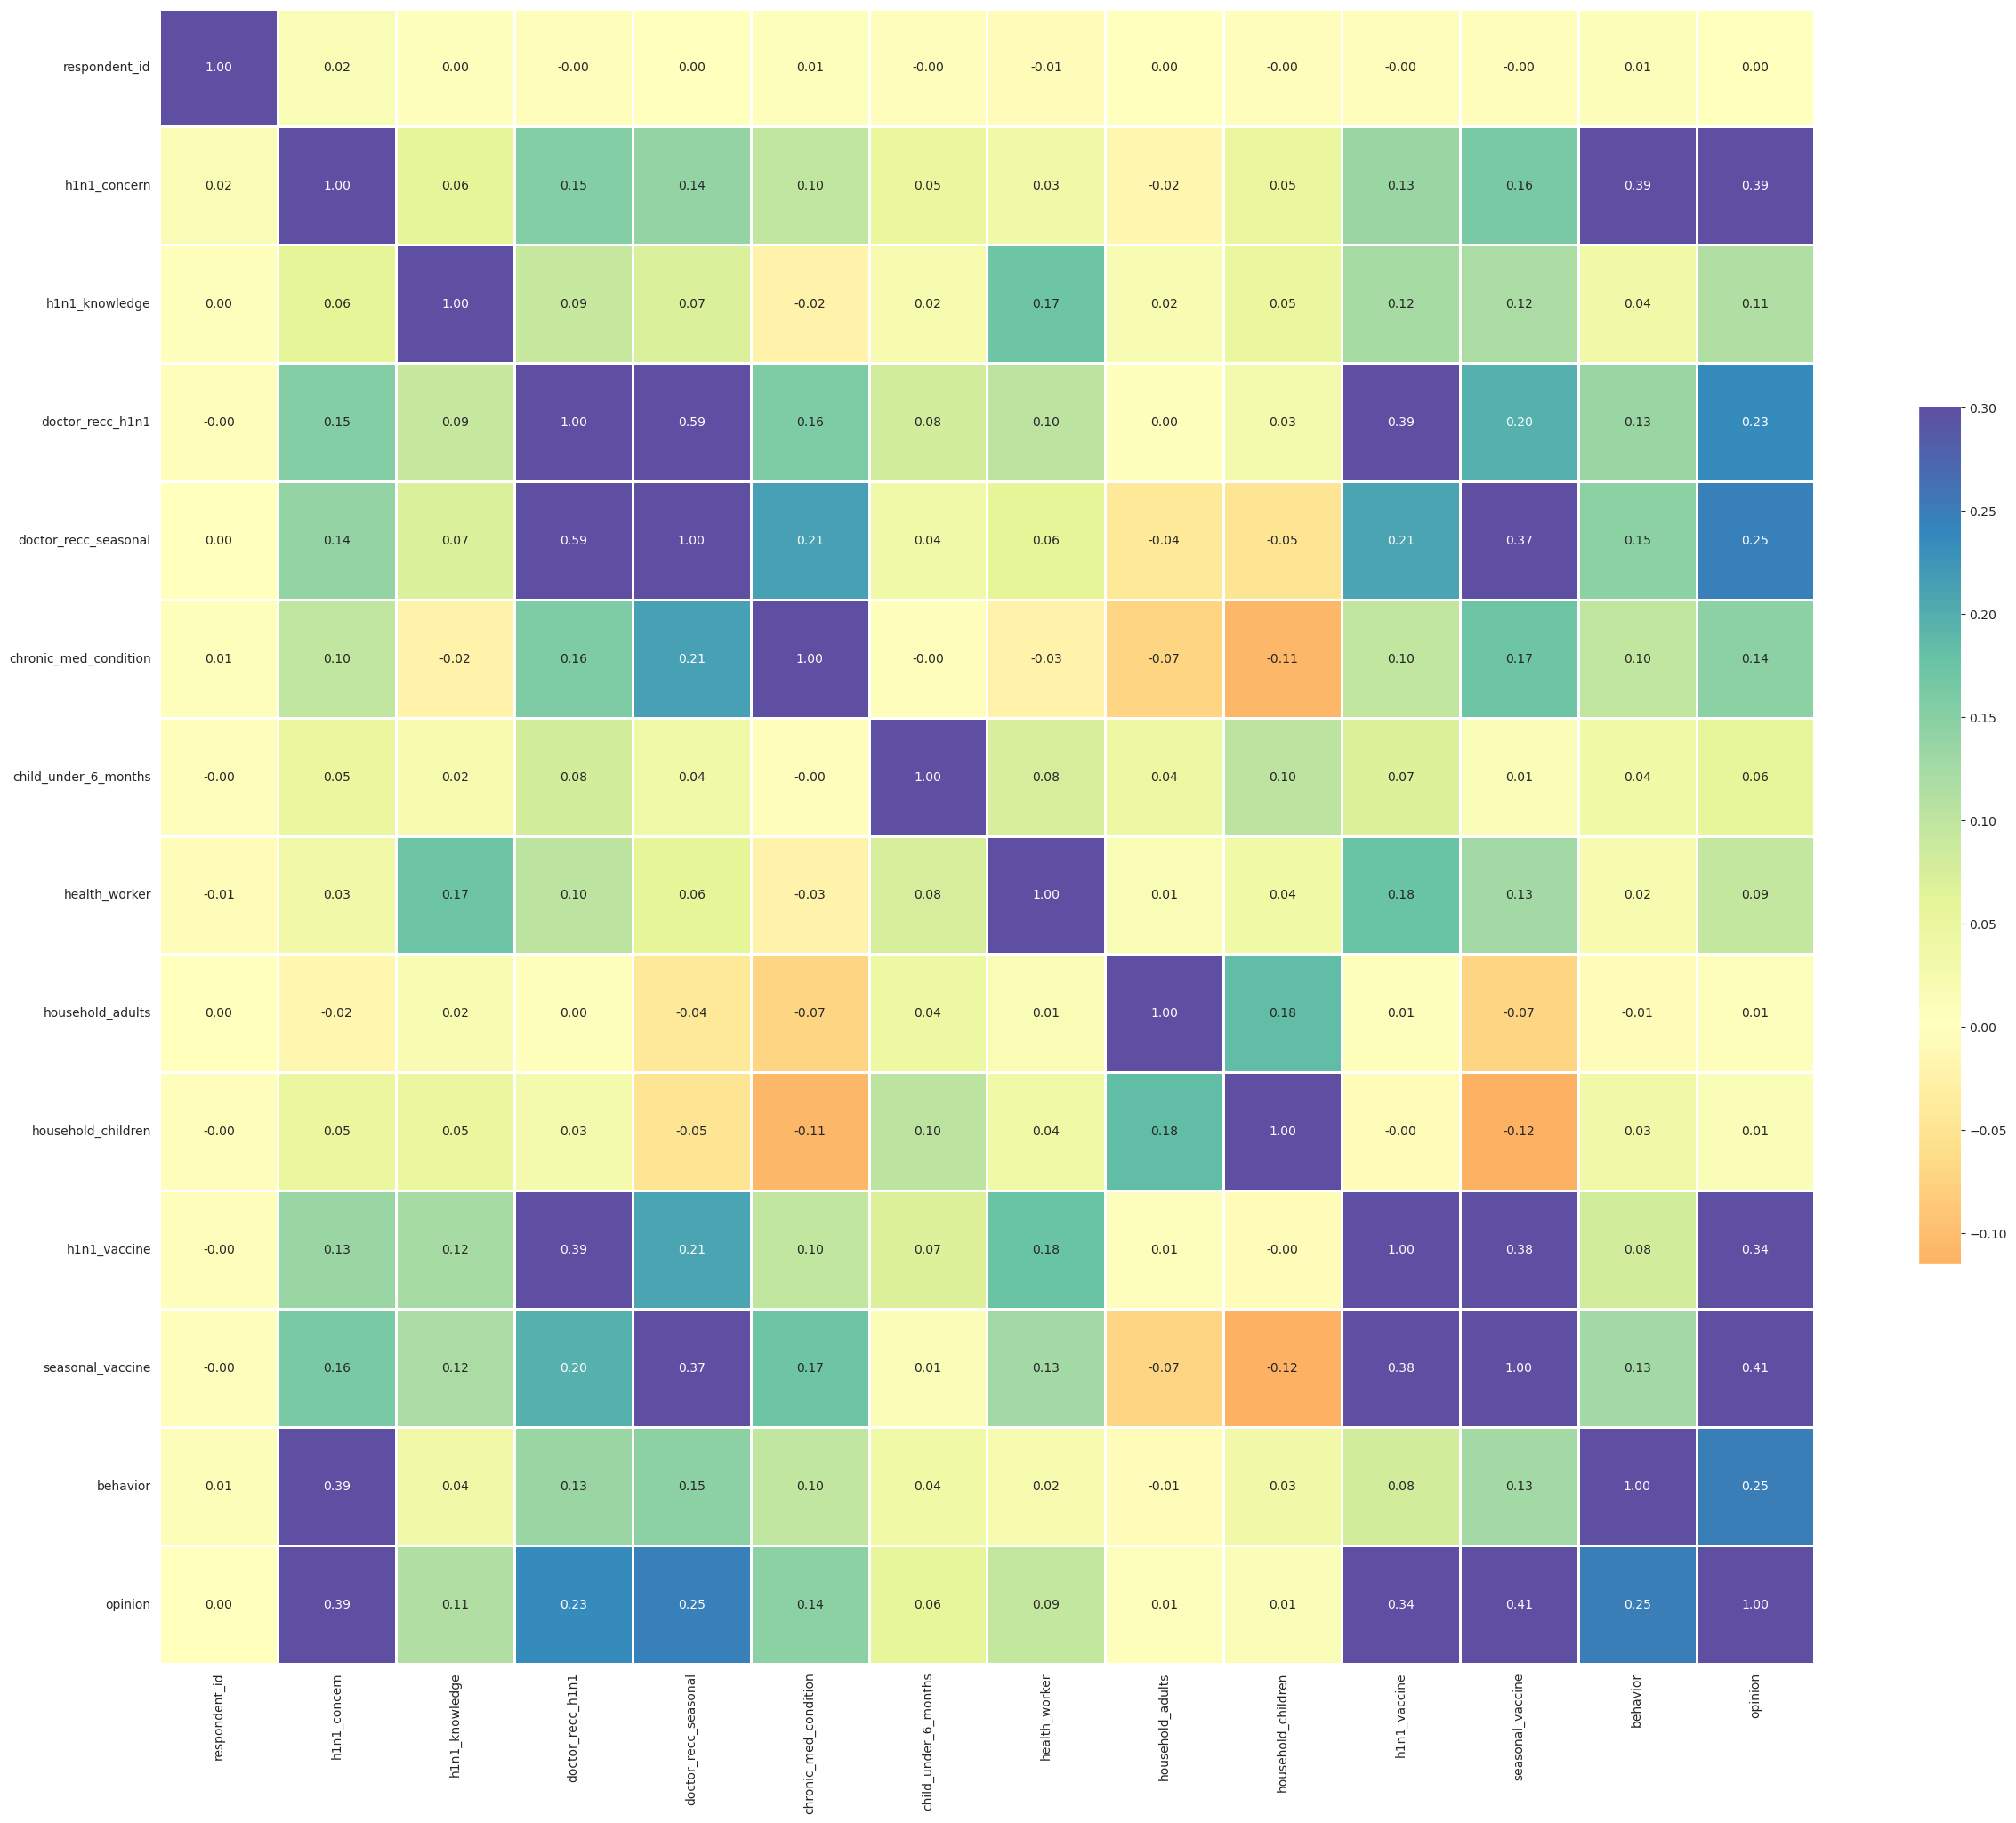

In [28]:
g = sns.heatmap(df.corr(numeric_only=True), vmax=0.3, center=0, square=True, linewidths=1, 
                cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30, 25)

plt.show()

high correlation h1n1_concern with behavior and opninion - it's obvious >> let's combine them

In [29]:
df.behavior = df.behavior * np.power(df.h1n1_concern + 1, 2)

df = df.drop(columns=['h1n1_concern'])

# Encoding features

In [30]:
df = df.set_index('respondent_id')

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [32]:
df.age_group = df.age_group.replace({'18 - 34 Years' : 0,
                                     '35 - 44 Years' : 1,
                                     '45 - 54 Years' : 2,
                                     '55 - 64 Years' : 3,
                                     '65+ Years' : 4})

df.education = df.education.replace({'unknown' : 0,
                                     '< 12 Years' : 1,
                                     '12 Years' : 2,
                                     'Some College' : 3,
                                     'College Graduate' : 4})

df.income_poverty = df.income_poverty.replace({'unknown' : 0,
                                               'Below Poverty' : 1,
                                               '<= $75,000, Above Poverty' : 2,
                                               '> $75,000' : 3})

In [33]:
onehot_features = ['race',
                   'sex',
                   'marital_status',
                   'rent_or_own', 
                   'employment_status', 
                   'hhs_geo_region',
                   'employment_industry',
                   'employment_occupation'
                  ]

standard_features = ['h1n1_knowledge',
                     'household_adults',
                     'household_children',
                     'behavior',
                     'opinion',
                     'age_group', 
                     'education', 
                     'income_poverty'
                    ]

In [34]:
ct = ColumnTransformer([('onehot', OneHotEncoder(drop='first'), onehot_features),
                        ('standardscaler', StandardScaler(), standard_features)],
                       remainder='passthrough'
                      )

In [35]:
x = df.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

y_h1n1 = df[['h1n1_vaccine']].copy()
y_seasonal = df[['seasonal_vaccine']].copy()

y_any = df[['h1n1_vaccine', 'seasonal_vaccine']].any(axis=1).astype(int)

In [49]:
x_train, x_test, y_h1n1_train, y_h1n1_test = train_test_split(x, y_h1n1, test_size=0.2, 
                                                              stratify=y_h1n1, random_state=42)
train_idx = y_h1n1_train.index
test_idx = y_h1n1_test.index

y_seasonal_train = y_seasonal.loc[train_idx]
y_seasonal_test = y_seasonal.loc[test_idx]

y_any_train = y_any.loc[train_idx]
y_any_test = y_any.loc[test_idx]